In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import the topsoil data:

In [2]:
top1 = np.loadtxt('../data/topsoil_900.0_10.0_23.125_Tue_Oct_29_13:15:30_2019')
top2 = np.loadtxt('../data/topsoil_900.0_10.0_24.187_Tue_Oct_29_14:50:16_2019')

Convert depth to volume:

In [3]:
top1[1,:] = (top1[1,0] - top1[1,:]) / 10. * np.pi * (2.25 * 2.54)**2
top2[1,:] = (top2[1,0] - top2[1,:]) / 10. * np.pi * (2.25 * 2.54)**2

Import the water data:

In [4]:
w1 = np.loadtxt('../data/water_only_900.0_10.0_24.562_Sat_Nov__2_17:16:00_2019')
w2 = np.loadtxt('../data/water_only_900.0_10.0_24.312_Sat_Nov__2_17:39:24_2019')

Clean by cutting data before valve opened and after flow stopped:

In [5]:
w1 = w1[:,45:130]
w2 = w2[:,50:150]

Convert depth to volume:

In [6]:
w1[1,:] = (w1[1,0] - w1[1,:]) / 10. * np.pi * (2.25 * 2.54)**2
w2[1,:] = (w2[1,0] - w2[1,:]) / 10. * np.pi * (2.25 * 2.54)**2

Create data frames:

In [7]:
dftop1 = pd.DataFrame(top1.T,columns=('time','volume','pressure'))
dftop2 = pd.DataFrame(top2.T,columns=('time','volume','pressure'))
dfw1 = pd.DataFrame(w1.T,columns=('time','volume','pressure'))
dfw2 = pd.DataFrame(w2.T,columns=('time','volume','pressure'))

In [8]:
dftop1.head()

,time,volume,pressure
0,59.314455,0.000000,950.77
1,59.474363,61.564959,950.62
2,59.666110,41.043306,950.76
3,59.858086,0.000000,950.77
4,60.017864,61.564959,950.78


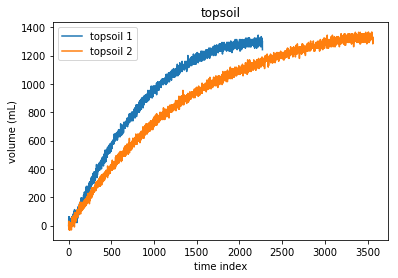

In [9]:
plt.plot(dftop1['volume'])
plt.plot(dftop2['volume'])
plt.title("topsoil")
plt.xlabel("time index")
plt.ylabel("volume (mL)")
plt.legend(['topsoil 1', 'topsoil 2']);

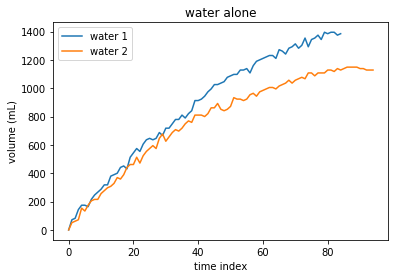

In [10]:
plt.plot(dfw1['volume'])
plt.plot(dfw2['volume'])
plt.title("water alone")
plt.xlabel("time index")
plt.ylabel("volume (mL)")
plt.legend(['water 1', 'water 2']);

Build symmetries

In [11]:
x = dftop1['volume'].to_numpy()
x1 = x[:min(np.where(x > 800)[0])].reshape(-1,1)
x2 = x[min(np.where(x > 800)[0]):min(np.where(x > 800)[0])+len(x1)].reshape(-1,1)
dftop1sym = pd.DataFrame(np.concatenate([x1,x2],axis=1),columns=['untrans','trans'])

x = dftop2['volume'].to_numpy()
x1 = x[:min(np.where(x > 800)[0])].reshape(-1,1)
x2 = x[min(np.where(x > 800)[0]):min(np.where(x > 800)[0])+len(x1)].reshape(-1,1)
dftop2sym = pd.DataFrame(np.concatenate([x1,x2],axis=1),columns=['untrans','trans'])

x = dfw1['volume'].to_numpy()
x1 = x[:min(np.where(x > 800)[0])].reshape(-1,1)
x2 = x[min(np.where(x > 800)[0]):min(np.where(x > 800)[0])+len(x1)].reshape(-1,1)
dfw1sym = pd.DataFrame(np.concatenate([x1,x2],axis=1),columns=['untrans','trans'])

x = dfw2['volume'].to_numpy()
x1 = x[:min(np.where(x > 800)[0])].reshape(-1,1)
x2 = x[min(np.where(x > 800)[0]):min(np.where(x > 800)[0])+len(x1)].reshape(-1,1)
dfw2sym = pd.DataFrame(np.concatenate([x1,x2],axis=1),columns=['untrans','trans'])

In [12]:
dftop1sym.head()

,untrans,trans
0,0.000000,800.344463
1,61.564959,769.561984
2,41.043306,779.822810
3,0.000000,779.822810
4,61.564959,790.083637


Plot symmetries all together:

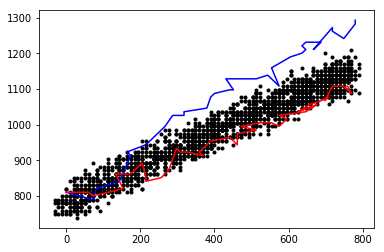

In [13]:
plt.figure()
plt.plot(dftop1sym['untrans'],dftop1sym['trans'],'k.',LineStyle='none');
plt.plot(dftop2sym['untrans'],dftop2sym['trans'],'k.',LineStyle='none');
plt.plot(dfw1sym['untrans'],dfw1sym['trans'],'b-');
plt.plot(dfw2sym['untrans'],dfw2sym['trans'],'r-');